# Impact of central bank interest rate decisions on inflation rates and markets
Project by: *Timo Gumpp*
Course: *Machine Learning for Portfolio Trading*
University: *ENSAE Paris*

### Objective of this project

1. Observe how accompanying press statements regarding decisions of interest rate changes differ (length, sentiment, sophistication, etc.)
2. Observe correlation of different press releases characteristics on the result of the interest change hike
3. Observe impact of characteristics of interest rate announcements (length, sentiment, sophistication, etc.) on inflation development
4. (Optionally, out of interest): Observe potential impact of characteristics of interest rate announcements (length, sentiment, sophistication, etc.) on capital markets (e.g., using the example of S&P 500 index)

### Loading Packages

In [96]:
import pandas as pd
import matplotlib
import nltk
#import spacy
from IPython.display import IFrame
import os
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import matplotlib.pyplot as plt

### Load in text

#### What to look at

I limit the project on the ECB and the FED, thus looking into inflation in the Eurozone and the US respectively.

***
- The ECB's council takes interest rate decisions x times a year and each time releases press statements.
- The Federal Open Market Commitee (FOMC – the FED's council on moneytary policy decisions) holds regularly scheduled meetings 8 times a year and other meetings as needed. Each time a press statement is released. Every second meeting, this seems to be accompanied by a summary of economic projections.

The released statements include xx

An **example for a press statement** from both the ECB and the FED can be viewed here and accessed under the these links: __[ECB_Dec23](https://www.ecb.europa.eu/press/pressconf/shared/pdf/ecb.ds231214~cbcff0882a.en.pdf)__ or __[FOMC_Dec23](https://www.federalreserve.gov/monetarypolicy/files/monetary20231213a1.pdf)__

In [8]:
os.getcwd()

'/Users/tgumpp/DataspellProjects/ICBIRDIRM'

In [12]:
filepath_exp_ecb = "./Documents/ECB/ecb231214.pdf"

In [13]:
IFrame(filepath_exp_ecb, width=600, height=300)

We primarily focus on the developments from 2022 to 2023, and will potentally look into developments in 2020 and 2021. The year 2024 is left out of our analysis.
The also release minutes, which we're not using in our analysis

The FOMC's press releases compose themselves of a press statement and an implementation note, highlighting which monetary measures are being taken.

In [7]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Download NLTK resources (you need to do this once)
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(text_test)

# Calculate word frequencies
word_freq = FreqDist(tokens)

# Display the most common words
print(word_freq.most_common(10))

[nltk_data] Downloading package punkt to /Users/tgumpp/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('the', 21), ('.', 16), ('and', 15), (',', 13), ('of', 12), ('to', 12), ('Committee', 11), ('The', 8), ('inflation', 8), ('policy', 6)]


#### Web Mining FOMC

Extraction of text is automated, the supply of the corresponding URLs not for now

In [57]:
fomc_statements_url_list = ['https://www.federalreserve.gov/newsevents/pressreleases/monetary20230201a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230322a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230503a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230614a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230726a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230920a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231101a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231213a.htm']

In [9]:
# To automate: Cycle through URLs here
url = "https://www.federalreserve.gov/newsevents/pressreleases/monetary20231101a.htm"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [55]:
target_text = soup.find('div', class_='col-xs-12 col-sm-8 col-md-8')
target_date = soup.find('p', class_='article__time')
target_url = soup.find('meta', property='og:url').get('content')

In [80]:
# TODO: add if / else if mining fails
def process_text(text):
    list = [title.text.strip() for title in text]
    text_final = ' '.join(map(str, list))
    return text_final

def process_date(date):
    raw_date = date.get_text(strip=True)
    #print("Raw Date:", raw_date)

    # Transform the date format
    datetime_object = datetime.strptime(raw_date, '%B %d, %Y')
    formatted_date = datetime_object.strftime('%d.%m.%Y')
    return formatted_date

def process_url(url):
    return url.split('/')[-1].split('.')[0]

In [81]:
df_fomc_press_statements = pd.DataFrame(columns = {"Filename", "Date", "Text"})

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      0 non-null      object
 1   Text      0 non-null      object
 2   Filename  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [82]:
for x in fomc_statements_url_list:
    page = requests.get(x)
    soup = BeautifulSoup(page.text, 'html')

    target_text = soup.find('div', class_='col-xs-12 col-sm-8 col-md-8')
    target_date = soup.find('p', class_='article__time')
    target_url = soup.find('meta', property='og:url').get('content')

    # run processing and add processed to df
    df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/3260275490.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/3260275490.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/3260275490.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [83]:
df_fomc_press_statements

,Date,Text,Filename
0,01.02.2023,Recent indicators point to modest growth in s...,monetary20230201a
1,22.03.2023,Recent indicators point to modest growth in s...,monetary20230322a
2,03.05.2023,Economic activity expanded at a modest pace i...,monetary20230503a
3,14.06.2023,Recent indicators suggest that economic activ...,monetary20230614a
4,26.07.2023,Recent indicators suggest that economic activ...,monetary20230726a
5,20.09.2023,Recent indicators suggest that economic activ...,monetary20230920a
6,01.11.2023,Recent indicators suggest that economic activ...,monetary20231101a
7,13.12.2023,Recent indicators suggest that growth of econ...,monetary20231213a


In [ ]:
def fill_df():

    df_fomc_press_statements['Filename'] = filename
    df_fomc_press_statements['Date'] = date
    df_fomc_press_statements['Text'] = text

### Load in inflation data

#### US inflation data

In [89]:
url_us_inf = "https://www.usinflationcalculator.com/inflation/current-inflation-rates/"
page_us_inf = requests.get(url_us_inf)
response = requests.get(url_us_inf)

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table data
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])]
    data.append(row_data)

# Create a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

In [94]:
df_us_inf = df
#df_us_inf = df_us_inf.drop(0)
df_us_inf

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
1,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1
2,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
3,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
4,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
5,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
6,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
7,2017,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
8,2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
9,2015,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1
10,2014,1.6,1.1,1.5,2.0,2.1,2.1,2.0,1.7,1.7,1.7,1.3,0.8,1.6


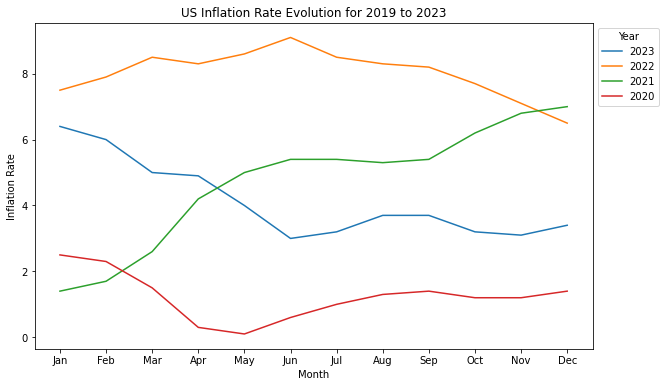

In [112]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(4)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

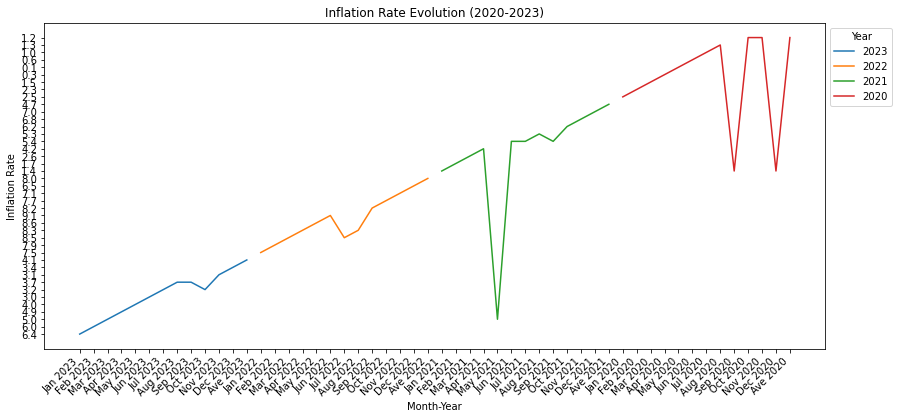

In [110]:
# Convert 'Year' column to integer
df_us_inf['Year'] = df_us_inf['Year'].astype(int)

# Reshape the DataFrame to a longer format
df_long = pd.melt(df_us_inf, id_vars='Year', var_name='Month', value_name='Inflation Rate')

# Filter data for the last 4 years (2020 to 2023)
df_long_last_4_years = df_long[df_long['Year'].between(2020, 2023)]

# Plot the evolution of inflation rates for the last 4 years
plt.figure(figsize=(14, 6))  # Adjust the figure size for better visibility

for year in sorted(df_long_last_4_years['Year'].unique(), reverse=True):
    df_subset = df_long_last_4_years[df_long_last_4_years['Year'] == year]
    plt.plot(df_subset['Month'] + ' ' + df_subset['Year'].astype(str), df_subset['Inflation Rate'], label=str(year))

plt.title('Inflation Rate Evolution (2020-2023)')
plt.xlabel('Month-Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### EU inflation data

### Processing text

Preprocessing text, these are typical steps to pursue to prepare a meaningful dataset for text.

- Lemmanization
- Stemming
- Removal of Stopwords
-

### First text analysis

In [71]:
def get_word_count(text):
    word_count = len(text.split())
    #print(f"Word Count: {word_count}")
    return word_count

def get_char_count(text):
    char_count = len(text)
    # print(f"Character Count: {char_count}")
    return char_count

In [69]:
df_fomc_press_statements = df_fomc_press_statements.assign(WordCount='', CharCount='')

In [114]:
df_fomc_press_statements.head()

,Date,Text,Filename,CharCount,WordCount
0,01.02.2023,Recent indicators point to modest growth in s...,monetary20230201a,NaN,NaN
1,22.03.2023,Recent indicators point to modest growth in s...,monetary20230322a,NaN,NaN
2,03.05.2023,Economic activity expanded at a modest pace i...,monetary20230503a,NaN,NaN
3,14.06.2023,Recent indicators suggest that economic activ...,monetary20230614a,NaN,NaN
4,26.07.2023,Recent indicators suggest that economic activ...,monetary20230726a,NaN,NaN


In [119]:
for x in df_fomc_press_statements['Text']:
    df_fomc_press_statements = df_fomc_press_statements.append({'WordCount': get_word_count(x), 'CharCount': get_char_count(x)}, ignore_index=False)

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/780147822.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'WordCount': get_word_count(x), 'CharCount': get_char_count(x)}, ignore_index=False)


TypeError: Can only append a dict if ignore_index=True

In [16]:
#Tokenizing
tokens = nltk.word_tokenize(text_test)

['Recent',
 'indicators',
 'suggest',
 'that',
 'growth',
 'of',
 'economic',
 'activity',
 'has',
 'slowed',
 'from',
 'its',
 'strong',
 'pace',
 'in',
 'the',
 'third',
 'quarter',
 '.',
 'Job',
 'gains',
 'have',
 'moderated',
 'since',
 'earlier',
 'in',
 'the',
 'year',
 'but',
 'remain',
 'strong',
 ',',
 'and',
 'the',
 'unemployment',
 'rate',
 'has',
 'remained',
 'low',
 '.',
 'Inflation',
 'has',
 'eased',
 'over',
 'the',
 'past',
 'year',
 'but',
 'remains',
 'elevated',
 '.',
 'The',
 'U.S.',
 'banking',
 'system',
 'is',
 'sound',
 'and',
 'resilient',
 '.',
 'Tighter',
 'financial',
 'and',
 'credit',
 'conditions',
 'for',
 'households',
 'and',
 'businesses',
 'are',
 'likely',
 'to',
 'weigh',
 'on',
 'economic',
 'activity',
 ',',
 'hiring',
 ',',
 'and',
 'inflation',
 '.',
 'The',
 'extent',
 'of',
 'these',
 'effects',
 'remains',
 'uncertain',
 '.',
 'The',
 'Committee',
 'remains',
 'highly',
 'attentive',
 'to',
 'inflation',
 'risks',
 '.',
 'The',
 'Committ

In [24]:
nltk.pos_tag(tokens)

[('Recent', 'JJ'),
 ('indicators', 'NNS'),
 ('suggest', 'VBP'),
 ('that', 'IN'),
 ('growth', 'NN'),
 ('of', 'IN'),
 ('economic', 'JJ'),
 ('activity', 'NN'),
 ('has', 'VBZ'),
 ('slowed', 'VBN'),
 ('from', 'IN'),
 ('its', 'PRP$'),
 ('strong', 'JJ'),
 ('pace', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('third', 'JJ'),
 ('quarter', 'NN'),
 ('.', '.'),
 ('Job', 'NNP'),
 ('gains', 'NNS'),
 ('have', 'VBP'),
 ('moderated', 'VBN'),
 ('since', 'IN'),
 ('earlier', 'RBR'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('year', 'NN'),
 ('but', 'CC'),
 ('remain', 'VBP'),
 ('strong', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('unemployment', 'NN'),
 ('rate', 'NN'),
 ('has', 'VBZ'),
 ('remained', 'VBN'),
 ('low', 'JJ'),
 ('.', '.'),
 ('Inflation', 'NN'),
 ('has', 'VBZ'),
 ('eased', 'VBN'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('year', 'NN'),
 ('but', 'CC'),
 ('remains', 'VBZ'),
 ('elevated', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('U.S.', 'NNP'),
 ('banking', 'NN'),
 ('system', 'NN'),
 ('is', 'V

In [23]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tgumpp/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Sentiment Analysis

In [68]:
from tqdm.notebook import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [116]:
df

for x in df_fomc_press_statements['Text']:
    #print(type(x))
    #print(type(sia.polarity_scores(x)))
    print(sia.polarity_scores(x))

{'neg': 0.078, 'neu': 0.846, 'pos': 0.076, 'compound': -0.5994}
{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'compound': 0.765}
{'neg': 0.051, 'neu': 0.881, 'pos': 0.068, 'compound': 0.6124}
{'neg': 0.05, 'neu': 0.879, 'pos': 0.072, 'compound': 0.743}
{'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'compound': 0.6124}
{'neg': 0.062, 'neu': 0.853, 'pos': 0.085, 'compound': 0.775}
{'neg': 0.061, 'neu': 0.853, 'pos': 0.086, 'compound': 0.8225}
{'neg': 0.059, 'neu': 0.847, 'pos': 0.094, 'compound': 0.9042}


AttributeError: 'float' object has no attribute 'encode'

In [117]:
# Create columns for sentiment scores
df_fomc_press_statements['compound'] = 0.0
#df['neg'] = 0.0
#df['neu'] = 0.0
#df['pos'] = 0.0

# Iterate through rows and calculate sentiment scores
for index, row in df_fomc_press_statements.iterrows():
    text = row['Text']
    scores = sia.polarity_scores(text)

    # Update the corresponding row with sentiment scores
    df_fomc_press_statements.at[index, 'compound'] = scores['compound']
    #df.at[index, 'neg'] = scores['neg']
    #df.at[index, 'neu'] = scores['neu']
    #df.at[index, 'pos'] = scores['pos']

AttributeError: 'float' object has no attribute 'encode'

In [122]:
df_fomc_press_statements = df_fomc_press_statements.head(8)
df_fomc_press_statements

,Date,Text,Filename,CharCount,WordCount,compound
0,01.02.2023,Recent indicators point to modest growth in s...,monetary20230201a,NaN,NaN,-0.5994
1,22.03.2023,Recent indicators point to modest growth in s...,monetary20230322a,NaN,NaN,0.7650
2,03.05.2023,Economic activity expanded at a modest pace i...,monetary20230503a,NaN,NaN,0.6124
3,14.06.2023,Recent indicators suggest that economic activ...,monetary20230614a,NaN,NaN,0.7430
4,26.07.2023,Recent indicators suggest that economic activ...,monetary20230726a,NaN,NaN,0.6124
5,20.09.2023,Recent indicators suggest that economic activ...,monetary20230920a,NaN,NaN,0.7750
6,01.11.2023,Recent indicators suggest that economic activ...,monetary20231101a,NaN,NaN,0.8225
7,13.12.2023,Recent indicators suggest that growth of econ...,monetary20231213a,NaN,NaN,0.9042


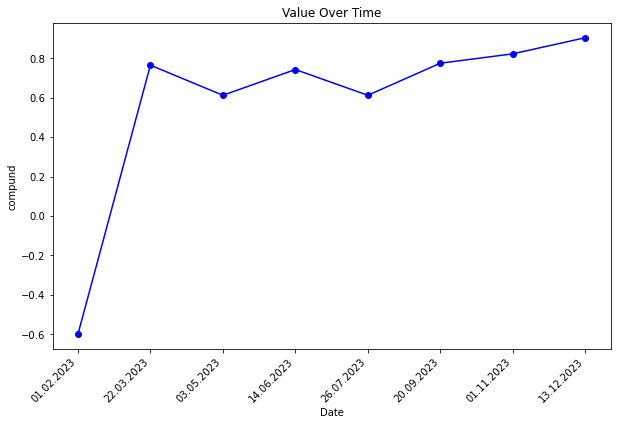

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(df_fomc_press_statements['Date'], df_fomc_press_statements['compound'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('compund')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

#### Roberta

### Comparing sentiment analysis with inflation rate development

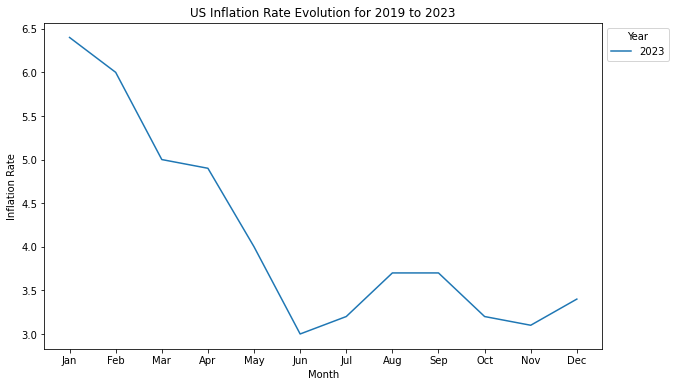

In [125]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(1)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()